In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')

print(df)

            Date        Open        High         Low       Close   Adj Close  \
0     2008-01-02   61.382053   61.382053   59.599995   59.897003   33.868557   
1     2008-01-03   59.302982   59.401985   58.807968   58.807968   33.252762   
2     2008-01-04   58.708965   59.798000   57.916939   59.401985   33.588646   
3     2008-01-07   56.431889   57.421921   55.243847   55.243847   31.237452   
4     2008-01-08   55.243847   56.035873   54.946838   55.441856   31.349407   
...          ...         ...         ...         ...         ...         ...   
3924  2023-12-25  582.000000  585.000000  580.000000  581.000000  576.073059   
3925  2023-12-26  583.000000  586.000000  582.000000  586.000000  581.030640   
3926  2023-12-27  587.000000  592.000000  586.000000  592.000000  586.979858   
3927  2023-12-28  592.000000  593.000000  589.000000  593.000000  587.971313   
3928  2023-12-29  589.000000  593.000000  589.000000  593.000000  587.971313   

         Volume       sma       rsi    

In [8]:


# 計算MACD指標的函數
def calculate_macd(df, short_window=12, long_window=26, signal_window=9):
    df['EMA12'] = df['Close'].ewm(span=short_window, min_periods=short_window, adjust=False).mean()
    df['EMA26'] = df['Close'].ewm(span=long_window, min_periods=long_window, adjust=False).mean()
    df['MACD'] = df['EMA12'] - df['EMA26']
    df['Signal_Line'] = df['MACD'].ewm(span=signal_window, min_periods=signal_window, adjust=False).mean()
    df['MACD_Histogram'] = df['MACD'] - df['Signal_Line']
    return df

# 調用計算MACD指標的函數
data = calculate_macd(df)

# 打印出計算後的數據，這裡只打印最後幾行
print(data[['Close', 'EMA12', 'EMA26', 'MACD', 'Signal_Line', 'MACD_Histogram']].tail(20))

data.to_csv('stocks.csv', index=False)


      Close       EMA12       EMA26      MACD  Signal_Line  MACD_Histogram
3909  574.0  574.123491  567.064519  7.058972     8.117243       -1.058271
3910  570.0  573.489108  567.281962  6.207145     7.735223       -1.528078
3911  570.0  572.952322  567.483298  5.469023     7.281983       -1.812960
3912  566.0  571.882734  567.373425  4.509309     6.727449       -2.218139
3913  570.0  571.593083  567.567986  4.025097     6.186978       -2.161881
3914  574.0  571.963378  568.044431  3.918946     5.733372       -1.814425
3915  578.0  572.892089  568.781881  4.110208     5.408739       -1.298531
3916  577.0  573.524075  569.390630  4.133445     5.153680       -1.020235
3917  582.0  574.828064  570.324658  4.503406     5.023625       -0.520220
3918  585.0  576.392977  571.411720  4.981257     5.015152       -0.033895
3919  585.0  577.717134  572.418259  5.298875     5.071896        0.226979
3920  585.0  578.837575  573.350240  5.487335     5.154984        0.332351
3921  585.0  579.785640  

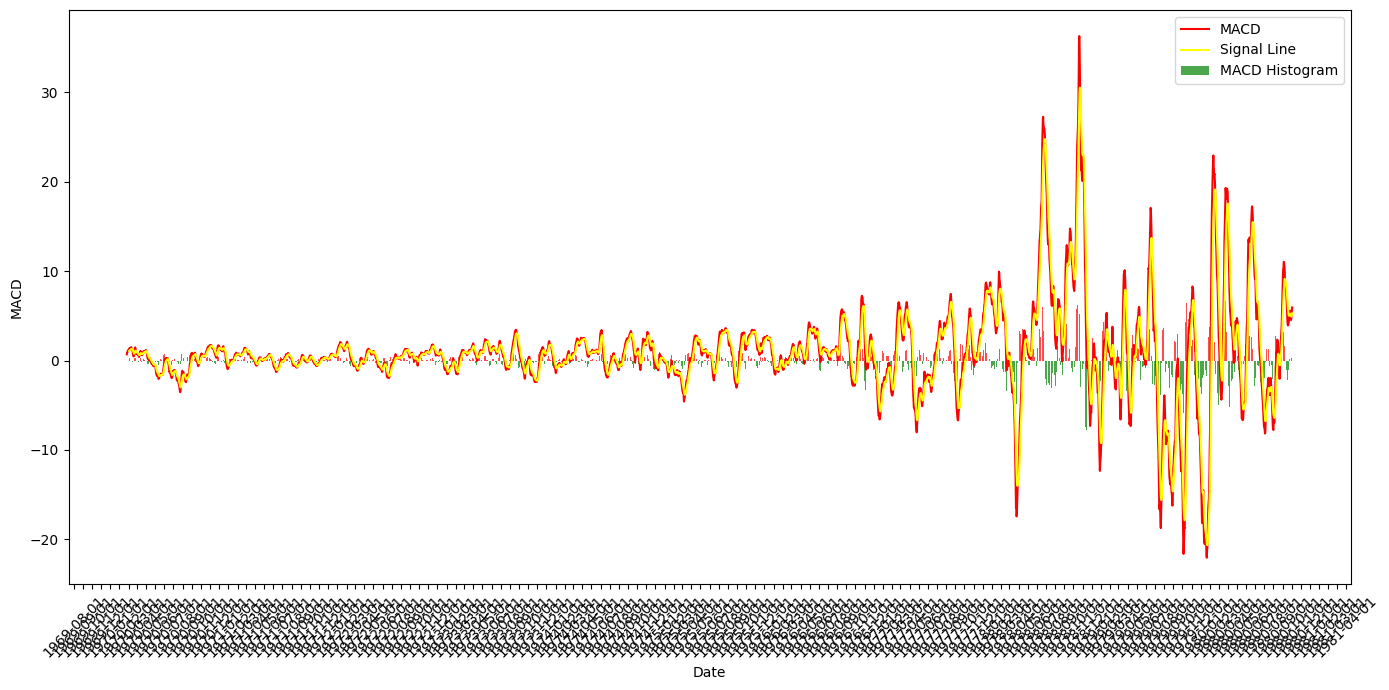

In [11]:
#MACD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf  # 或者使用其他的金融資料源


# 繪製MACD圖表
plt.figure(figsize=(14, 7))

# 繪製快速線（MACD line），紅色
plt.plot(data.index, data['MACD'], color='red', label='MACD')

# 繪製信號線（Signal line），黃色
plt.plot(data.index, data['Signal_Line'], color='yellow', label='Signal Line')

# 繪製柱狀圖（Histogram），高為紅色，低為綠色
plt.bar(data.index, data['MACD_Histogram'], width=0.7, color=np.where(data['MACD_Histogram'] >= 0, 'red', 'green'), alpha=0.7, label='MACD Histogram')

# 添加圖表元素和標籤

plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()

# 設置x軸為時間格式
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

# 顯示圖表
plt.tight_layout()
plt.show()


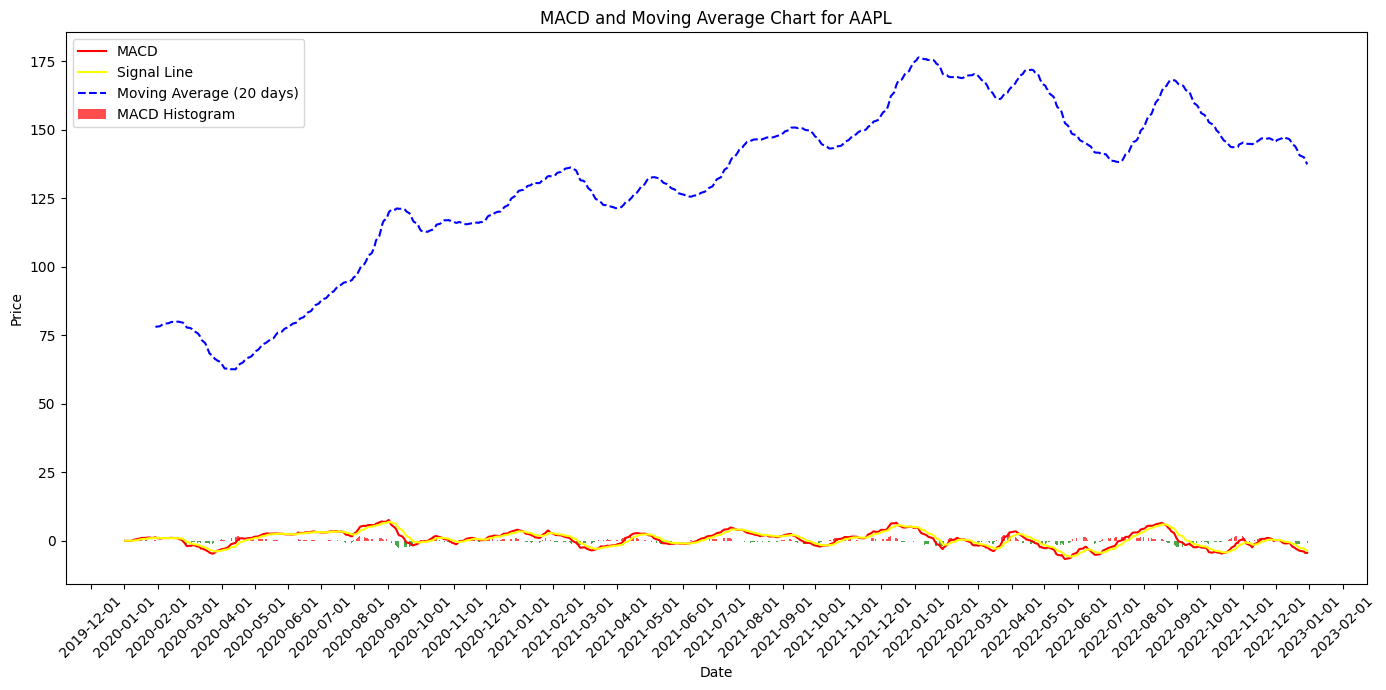

In [22]:
#MACD 與 MA


# 計算移動平均（MA）
ma_window = 20
data['MA'] = data['Close'].rolling(window=ma_window).mean()

# 繪製MACD圖表和MA柱狀圖
plt.figure(figsize=(14, 7))

# 繪製快速線（MACD line），紅色
plt.plot(data.index, data['MACD'], color='red', label='MACD')

# 繪製信號線（Signal line），黃色
plt.plot(data.index, data['Signal_line'], color='yellow', label='Signal Line')

# 繪製柱狀圖（Histogram），高為紅色，低為綠色
plt.bar(data.index, data['MACD_hist'], width=0.7, color=np.where(data['MACD_hist'] >= 0, 'red', 'green'), alpha=0.7, label='MACD Histogram')

# 繪製移動平均線（MA），藍色虛線
plt.plot(data.index, data['MA'], color='blue', linestyle='--', label=f'Moving Average ({ma_window} days)')

# 添加圖表元素和標籤
plt.title('MACD and Moving Average Chart for ' + ticker)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# 設置x軸為時間格式
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

# 顯示圖表
plt.tight_layout()
plt.show()


c:\Users\ting\miniconda3\envs\venv1\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\ting\AppData\Local\Temp\ipykernel_10536\2023696323.py:27: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ting\AppData\Local\Temp\ipykernel_10536\2023696323.py:27: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ting\AppData\Local\Temp\ipykernel_10536\2023696323.py:27: UserWarning: Glyph 21644

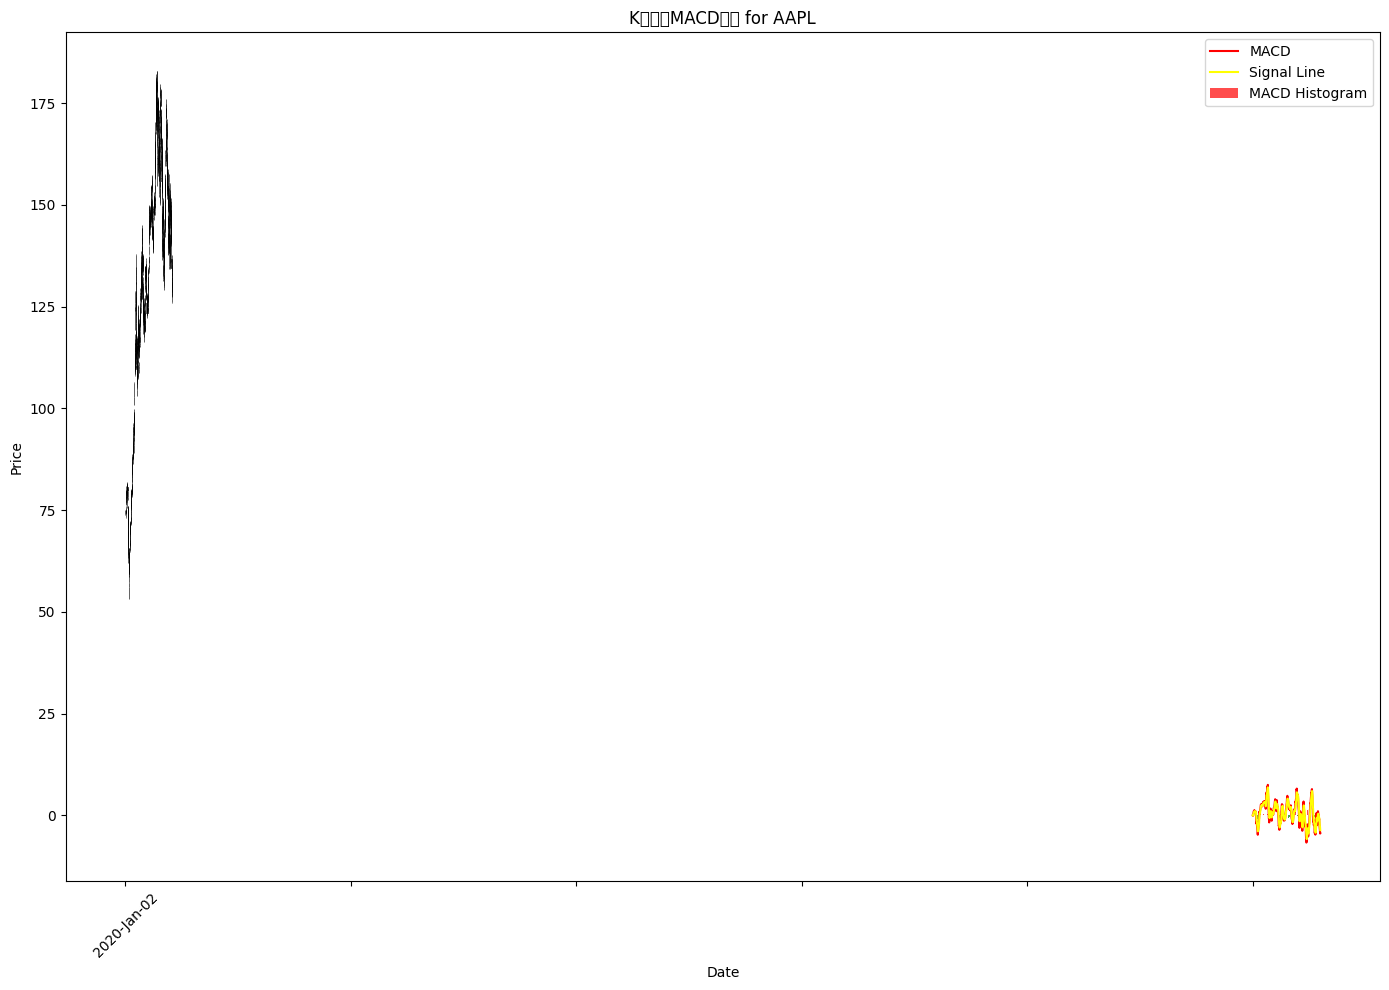

In [23]:

import mplfinance as mpf  # 导入mplfinance库

# 设置K线图的数据
ohlc = data[['Open', 'High', 'Low', 'Close']]

# 创建一个图表
plt.figure(figsize=(14, 10))

# 绘制K线图（蜡烛图）和MACD指标
ax = plt.subplot()

# 绘制K线图（蜡烛图）
mpf.plot(ohlc, type='candle', ax=ax, volume=False, show_nontrading=False)

# 绘制MACD指标
ax.plot(data.index, data['MACD'], color='red', label='MACD')
ax.plot(data.index, data['Signal_line'], color='yellow', label='Signal Line')
ax.bar(data.index, data['MACD_hist'], width=0.7, color=np.where(data['MACD_hist'] >= 0, 'red', 'green'), alpha=0.7, label='MACD Histogram')
ax.legend()

# 设置图表的标题和标签
plt.title('K线图和MACD图表 for ' + ticker)
plt.xlabel('Date')
plt.ylabel('Price')

# 显示图表
plt.tight_layout()
plt.show()
